<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%EC%9E%94%EB%94%94%EC%8B%AC%EA%B8%B0/%EA%B1%B4%EB%AC%BC%EB%8D%B0%EC%9D%B4%ED%84%B0_EDA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from scipy.stats import skew
from scipy.stats import spearmanr

In [31]:
df = pd.read_csv('/content/sample_data/Building_Cooling.csv')
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   2160 non-null   int64  
 1   hour                   2160 non-null   int64  
 2   lights [kW]            2160 non-null   float64
 3   mech [kW]              2160 non-null   float64
 4   CHWSupplyTemp [F]      2160 non-null   float64
 5   OAT [C]                2160 non-null   float64
 6   RH [%]                 2160 non-null   int64  
 7   Dewpoint               2160 non-null   float64
 8   wind_speed             2160 non-null   float64
 9   wind_direction         2160 non-null   int64  
 10  Diffsolar [W/m2]       2160 non-null   int64  
 11  Dirsolar [W/m2]        2160 non-null   int64  
 12  CHWCoolingEnergy [kW]  2160 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 219.5 KB


In [32]:
# renaming columns
df.columns = ['date', 'hour', 'lights', 'mechanic', 'CHWTemp', 'OAT', 'RH', 'Dewpoint','windspeed', 'winddirection','difsolar', 'dirsolar', 'target']

In [33]:
# 데이터 시각화 스타일링 지정
sns.set_style('whitegrid')

In [34]:
# date의 int64 정수형을 문자열 형식으로 변환
df['date']= df['date'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2160 non-null   object 
 1   hour           2160 non-null   int64  
 2   lights         2160 non-null   float64
 3   mechanic       2160 non-null   float64
 4   CHWTemp        2160 non-null   float64
 5   OAT            2160 non-null   float64
 6   RH             2160 non-null   int64  
 7   Dewpoint       2160 non-null   float64
 8   windspeed      2160 non-null   float64
 9   winddirection  2160 non-null   int64  
 10  difsolar       2160 non-null   int64  
 11  dirsolar       2160 non-null   int64  
 12  target         2160 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 219.5+ KB


In [41]:
# pandas의 datetime 형식으로 변환
e_df = df.copy()
e_df['date'] = pd.to_datetime(df['date'])
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2160 non-null   datetime64[ns]
 1   hour           2160 non-null   int64         
 2   lights         2160 non-null   float64       
 3   mechanic       2160 non-null   float64       
 4   CHWTemp        2160 non-null   float64       
 5   OAT            2160 non-null   float64       
 6   RH             2160 non-null   int64         
 7   Dewpoint       2160 non-null   float64       
 8   windspeed      2160 non-null   float64       
 9   winddirection  2160 non-null   int64         
 10  difsolar       2160 non-null   int64         
 11  dirsolar       2160 non-null   int64         
 12  target         2160 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(5)
memory usage: 219.5 KB


In [42]:
e_df.head(3)

,date,hour,lights,mechanic,CHWTemp,OAT,RH,Dewpoint,windspeed,winddirection,difsolar,dirsolar,target
0,2017-05-10,1,1.66,0.35,44.9025,20.6,87,18.3,5.2,190,0,0,77.075388
1,2017-05-10,2,3.44,0.35,44.9175,20.6,87,18.3,3.6,180,0,0,36.756450
2,2017-05-10,3,1.22,0.35,45.1725,21.1,84,18.3,4.1,200,0,0,0.000000


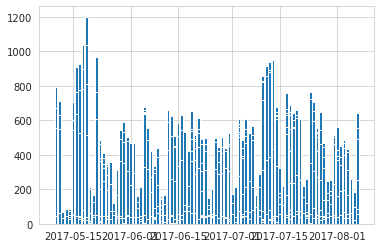

In [47]:
energy = e_df['target']
plt.bar(e_df['date'], e_df['target'])
plt.show()

In [ ]:
mean = energy.mean().round(3)
std = energy.std().round(3)
skew = (3*(mean - np.median(energy))/energy.std()).round(3)
if skew >= 1.5: